In [1]:
import pandas as pd
import numpy as np

# aisle = pd.read_csv('C:/Users/lyn02/Desktop/CMPE255 Project/Raw Data/aisles.csv')
# department = pd.read_csv('C:/Users/lyn02/Desktop/CMPE255 Project/Raw Data/departments.csv')
# order_products_prior = pd.read_csv('C:/Users/lyn02/Desktop/CMPE255 Project/Raw Data/order_products__prior.csv')
# order_products_train = pd.read_csv('C:/Users/lyn02/Desktop/CMPE255 Project/Raw Data/order_products__train.csv')
# orders = pd.read_csv('C:/Users/lyn02/Desktop/CMPE255 Project/Raw Data/orders.csv')
# products = pd.read_csv('C:/Users/lyn02/Desktop/CMPE255 Project/Raw Data/products.csv')

# zyl --------- zyl
aisle = pd.read_csv('../DataSets/aisles.csv')
department = pd.read_csv('../DataSets/departments.csv')
order_products_prior = pd.read_csv('../DataSets/order_products__prior.csv')
order_products_train = pd.read_csv('../DataSets/order_products__train.csv')
orders = pd.read_csv('../DataSets/orders.csv')
products = pd.read_csv('../DataSets/products.csv')
# zyl --------- zyl


In [4]:
# Take out orderID and productID from both train and prior table and merge them into one order_products_id table
order_products_id1 = order_products_train[['order_id','product_id']]
order_products_id2 = order_products_prior[['order_id','product_id']]
order_products_id = order_products_id1.append(order_products_id2, ignore_index=True)
# order_products_id

In [5]:
# take out orderID and userID from orders table
order_user_id = orders[['order_id','user_id']]
order_user_id

,order_id,user_id
0,2539329,1
1,2398795,1
2,473747,1
3,2254736,1
4,431534,1
...,...,...
3421078,2266710,206209
3421079,1854736,206209
3421080,626363,206209
3421081,2977660,206209


In [6]:
# to see how many orders each user has altogether
user_order_count = order_user_id[['user_id','order_id']]
user_order_count['order_id'] = order_user_id['user_id']
user_order_count = user_order_count.groupby(user_order_count.columns.tolist()).size().reset_index().rename(columns={0:'count'})
user_order_count = user_order_count[['user_id','count']]
user_order_count

,user_id,count
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5
...,...,...
206204,206205,4
206205,206206,68
206206,206207,17
206207,206208,50


In [7]:
#combine order_products and products table to see what aisle each product belongs for each order
order_product_aisle = order_products_id.merge(products,on='product_id')
order_product_aisle

,order_id,product_id,product_name,aisle_id,department_id
0,1,49302,Bulgarian Yogurt,120,16
1,816049,49302,Bulgarian Yogurt,120,16
2,1242203,49302,Bulgarian Yogurt,120,16
3,1383349,49302,Bulgarian Yogurt,120,16
4,1787378,49302,Bulgarian Yogurt,120,16
...,...,...,...,...,...
33819101,3265099,43492,Gourmet Burger Seasoning,104,13
33819102,3361945,43492,Gourmet Burger Seasoning,104,13
33819103,3267201,33097,Piquillo & Jalapeno Bruschetta,81,15
33819104,3393151,38977,Original Jerky,100,21


In [8]:
#from order_product_aisle table, only select orderID and aisleID to aggregate some data since we only deal with 
#aisle level granularity
#In addition, count of products from each aisle for each order is kept
order_aisle_id = order_product_aisle[['order_id','aisle_id']]
order_aisle_id
order_aisle_count = order_aisle_id.groupby(order_aisle_id.columns.tolist()).size().reset_index().rename(columns={0:'count'})
order_aisle_count

,order_id,aisle_id,count
0,1,21,1
1,1,24,2
2,1,83,2
3,1,95,1
4,1,108,1
...,...,...,...
24329217,3421083,52,1
24329218,3421083,74,1
24329219,3421083,78,1
24329220,3421083,92,4


In [9]:
#join order_user_id table and order_aisle_count table to see which order belongs to which user
order_user_aisle = order_aisle_count.merge(order_user_id, on='order_id')
order_user_aisle

,order_id,aisle_id,count,user_id
0,1,21,1,112108
1,1,24,2,112108
2,1,83,2,112108
3,1,95,1,112108
4,1,108,1,112108
...,...,...,...,...
24329217,3421083,52,1,25247
24329218,3421083,74,1,25247
24329219,3421083,78,1,25247
24329220,3421083,92,4,25247


In [10]:
#from order_user_aisle table, take out orderID
user_aisle_id = order_user_aisle[['user_id','aisle_id','count']]
user_aisle_id

,user_id,aisle_id,count
0,112108,21,1
1,112108,24,2
2,112108,83,2
3,112108,95,1
4,112108,108,1
...,...,...,...
24329217,25247,52,1
24329218,25247,74,1
24329219,25247,78,1
24329220,25247,92,4


In [11]:
# continue from previos step, we maintain count of orders for each aisle belonging to each user
user_aisle_count = user_aisle_id.groupby(user_aisle_id.columns.tolist()).size().reset_index().rename(columns={0:'rcount'})
user_aisle_count

,user_id,aisle_id,count,rcount
0,1,21,1,9
1,1,23,1,9
2,1,23,2,2
3,1,24,1,1
4,1,24,4,1
...,...,...,...,...
8121982,206209,121,1,7
8121983,206209,123,1,2
8121984,206209,123,3,1
8121985,206209,130,1,3


In [12]:
#continue from previous step, we multiple two count column to get how many products each user bought from each aisle altogether
user_aisle_count['count'] = user_aisle_count['count']*user_aisle_count['rcount']

In [13]:
user_aisle_count = user_aisle_count[['user_id','aisle_id','count']]
user_aisle_count

,user_id,aisle_id,count
0,1,21,9
1,1,23,9
2,1,23,4
3,1,24,1
4,1,24,4
...,...,...,...
8121982,206209,121,7
8121983,206209,123,2
8121984,206209,123,3
8121985,206209,130,3


In [14]:
# user_order_count left join user_aisle_count
#count_x = product count
#count_y = order count
user_aisle_order_count = user_aisle_count.merge(user_order_count, how='left',on='user_id')
user_aisle_order_count


,user_id,aisle_id,count_x,count_y
0,1,21,9,11
1,1,23,9,11
2,1,23,4,11
3,1,24,1,11
4,1,24,4,11
...,...,...,...,...
8121982,206209,121,7,14
8121983,206209,123,2,14
8121984,206209,123,3,14
8121985,206209,130,3,14


In [15]:
# divide product count by order count to get for aisle, how many products on average each customer would buy per order
user_aisle_order_count['avg'] = user_aisle_order_count['count_x']/user_aisle_order_count['count_y']
user_aisle_avgCount = user_aisle_order_count[['user_id','aisle_id','avg']]
user_aisle_avgCount

,user_id,aisle_id,avg
0,1,21,0.818182
1,1,23,0.818182
2,1,23,0.363636
3,1,24,0.090909
4,1,24,0.363636
...,...,...,...
8121982,206209,121,0.500000
8121983,206209,123,0.142857
8121984,206209,123,0.214286
8121985,206209,130,0.214286


In [16]:
#pivot table
table = pd.pivot_table(user_aisle_avgCount, values='avg', index=['user_id'],columns=['aisle_id'], aggfunc=np.sum, fill_value=0)

In [17]:
table

aisle_id,1,2,3,4,5,6,7,8,9,10,...,125,126,127,128,129,130,131,132,133,134
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
2,0.133333,0.000000,0.466667,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
3,0.000000,0.000000,0.000000,0.307692,0.00,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.166667,0.000000,0.000000,0.000000,0.0,0.0,0.166667
5,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
206206,0.000000,0.044118,0.102941,0.014706,0.00,0.014706,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.044118,0.000000,0.000000,0.0,0.0,0.000000
206207,0.000000,0.000000,0.352941,0.000000,0.00,0.000000,0.117647,0.0,0.352941,0.0,...,0.058824,0.0,0.0,0.117647,0.000000,0.176471,0.058824,0.0,0.0,0.000000


In [35]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

table_arr = table.values
kmeans = KMeans(n_clusters=4, random_state=0).fit(table_arr)

start


In [48]:
kmeans = KMeans(n_clusters=1, random_state=0).fit(table_arr)
MSE = []
MSE.append(kmeans.inertia_)
for i in range(1,12):
    print('start')
    KM_model = KMeans(n_clusters=i*3, random_state=0).fit(table_arr)
    print(KM_model.inertia_)
    MSE.append(KM_model.inertia_)


start
968951.8766834645
start
872509.5251716399
start
820224.4722039796
start
784671.2595469577
start
759355.1925682916
start
739998.0308377867
start
724705.5399973957
start
712231.5680286671
start
701871.1418298449
start
691928.549257858
start
683102.5748005619


Text(0.5, 1.0, ' Elbow curve ')

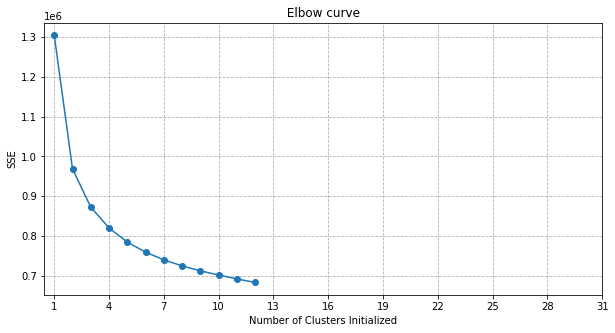

In [57]:
xticks = [1]
for i in range(1,12):
    xticks.append(i*3)
plt.figure(figsize=(10,5))   
plt.plot(range(1,13),MSE,'o-')
plt.xticks(range(1,33,3))
plt.grid(linestyle='--')
plt.xlabel("Number of Clusters Initialized")
plt.ylabel('SSE')
plt.title(" Elbow curve ")

# aprior analysis

### after clustering,it will generate k classes,each class will have a list of user_ids inside that class,next step is to apply basket anaysis on each classification,to get the rules of each class

In [ ]:
aisle = pd.read_csv('../DataSets/aisles.csv')
department = pd.read_csv('../DataSets/departments.csv')
order_products_prior = pd.read_csv('../DataSets/order_products__prior.csv')
order_products_train = pd.read_csv('../DataSets/order_products__train.csv')
orders = pd.read_csv('../DataSets/orders.csv')
products = pd.read_csv('../DataSets/products.csv')

In [28]:
print(order_user_id)
order_products_id
user_product_id=order_user_id.merge(order_products_id,left_on='order_id', right_on='order_id')

         order_id  user_id
0         2539329        1
1         2398795        1
2          473747        1
3         2254736        1
4          431534        1
...           ...      ...
3421078   2266710   206209
3421079   1854736   206209
3421080    626363   206209
3421081   2977660   206209
3421082    272231   206209

[3421083 rows x 2 columns]


In [29]:
user_product_id

,order_id,user_id,product_id
0,2539329,1,196
1,2539329,1,14084
2,2539329,1,12427
3,2539329,1,26088
4,2539329,1,26405
...,...,...,...
33819101,272231,206209,40603
33819102,272231,206209,15655
33819103,272231,206209,42606
33819104,272231,206209,37966


In [20]:
user_k_classification = {
    '1':[],
    '2':[]
}
user_class1=[]
for i in range(1,2000):
    user_class1.append(i)


In [36]:
user_product_part1 = user_product_id[user_product_id['user_id'].isin(user_class1) ]
user_product_part1

,order_id,user_id,product_id
0,2539329,1,196
1,2539329,1,14084
2,2539329,1,12427
3,2539329,1,26088
4,2539329,1,26405
...,...,...,...
313344,1801460,1999,39275
313345,1801460,1999,40136
313346,1801460,1999,25146
313347,1502181,1999,23493


In [44]:
user_product_dic={}
for item in user_product_part1.itertuples():
    
    if(user_product_dic.get(item[2])):
        user_product_dic[item[2]].append(item[3])
    else:
        user_product_dic[item[2]] = [] 
        user_product_dic[item[2]].append(item[3])
transaction = []
for item in user_product_dic:
    transaction.append(user_product_dic[item])

In [45]:
transaction

[[196,
  14084,
  12427,
  26088,
  26405,
  196,
  10258,
  12427,
  13176,
  26088,
  13032,
  196,
  12427,
  10258,
  25133,
  30450,
  196,
  12427,
  10258,
  25133,
  26405,
  196,
  12427,
  10258,
  25133,
  10326,
  17122,
  41787,
  13176,
  196,
  12427,
  10258,
  25133,
  196,
  10258,
  12427,
  25133,
  13032,
  12427,
  196,
  10258,
  25133,
  46149,
  49235,
  49235,
  46149,
  25133,
  196,
  10258,
  12427,
  196,
  46149,
  39657,
  38928,
  25133,
  10258,
  35951,
  13032,
  12427,
  196,
  25133,
  38928,
  26405,
  39657,
  10258,
  13032,
  26088,
  27845,
  49235,
  46149],
 [32792,
  47766,
  20574,
  12000,
  48110,
  22474,
  16589,
  35917,
  27344,
  30489,
  27966,
  13176,
  45066,
  16797,
  47526,
  8479,
  47766,
  19051,
  8138,
  47766,
  32792,
  20574,
  7781,
  28874,
  49451,
  32792,
  32139,
  34688,
  36735,
  37646,
  22829,
  24852,
  47209,
  33276,
  45613,
  9681,
  21150,
  47144,
  5322,
  17224,
  38656,
  21376,
  48210,
  5907,
 

In [48]:
import time
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth
te = TransactionEncoder()
te_ary = te.fit(transaction).transform(transaction)

df = pd.DataFrame(te_ary, columns=te.columns_)
t1 = time.time()
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
t2 = time.time()
print(t2-t1)
frequent_itemsets

0.10402703285217285


,support,itemsets
0,0.124062,(4605)
1,0.129065,(4920)
2,0.130065,(5876)
3,0.113057,(8277)
4,0.128564,(8518)
5,0.109055,(9076)
6,0.314157,(13176)
7,0.217109,(16797)
8,0.128064,(17794)
9,0.287644,(21137)


In [51]:
from mlxtend.frequent_patterns import association_rules

association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(13176),(21137),0.314157,0.287644,0.150075,0.477707,1.660759,0.059710,1.363901
1,(21137),(13176),0.287644,0.314157,0.150075,0.521739,1.660759,0.059710,1.434035
2,(13176),(21903),0.314157,0.270635,0.132066,0.420382,1.553316,0.047044,1.258354
3,(21903),(13176),0.270635,0.314157,0.132066,0.487985,1.553316,0.047044,1.339498
4,(13176),(47209),0.314157,0.210105,0.122561,0.390127,1.856821,0.056555,1.295180
5,(47209),(13176),0.210105,0.314157,0.122561,0.583333,1.856821,0.056555,1.646023
6,(21137),(16797),0.287644,0.217109,0.102051,0.354783,1.634125,0.039601,1.213376
7,(16797),(21137),0.217109,0.287644,0.102051,0.470046,1.634125,0.039601,1.344185
8,(24852),(16797),0.345673,0.217109,0.113557,0.328509,1.513111,0.038508,1.165901
9,(16797),(24852),0.217109,0.345673,0.113557,0.523041,1.513111,0.038508,1.371874
